## 3.0 Data Modelling and Evaluation

In this section, I will perform classifications on 7 models. There

In [300]:
# load packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

# packages for pre-processing
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# building the pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# display full columns and rows
pd.options.display.max_colwidth = 400

In [301]:
from nltk.corpus import stopwords

# include the common words found on the threads
english_stopwords = stopwords.words('english')
english_stopwords.extend(['hi', 'all', 'everyone', 'thank you', 'hello', 'mod', 'edit', 'etc', 'im', 'me', 'ive', 'thank',
                         'like', 'would'])

In [302]:
# read in data
merged_df = pd.read_csv('./dataset/merged_df.csv')

In [303]:
merged_df.shape

(3022, 7)

In [304]:
merged_df

,index,message,category,clean_mesg,tokens,filtered_tokens,lem_tokens
0,0.0,[MOD] The Daily Question Thread,1,MOD The Daily Question Thread,"['mod', 'the', 'daily', 'question', 'thread']","['daily', 'thread']","['daily', 'thread']"
1,1.0,[MOD] What have you been brewing this week?/ Coffee bean recommendations,1,MOD What have you been brewing this week Coffee bean recommendations,"['mod', 'what', 'have', 'you', 'been', 'brewing', 'this', 'week', 'coffee', 'bean', 'recommendations']","['brewing', 'week', 'coffee', 'bean', 'recommendations']","['brewing', 'week', 'coffee', 'bean', 'recommendation']"
2,2.0,Aeromatic by Aeropress app,1,Aeromatic by Aeropress app,"['aeromatic', 'by', 'aeropress', 'app']","['aeromatic', 'aeropress', 'app']","['aeromatic', 'aeropress', 'app']"
3,3.0,"Squarespace tools make viewing, editing and selling on mobile simple.",1,Squarespace tools make viewing editing and selling on mobile simple,"['squarespace', 'tools', 'make', 'viewing', 'editing', 'and', 'selling', 'on', 'mobile', 'simple']","['squarespace', 'tools', 'make', 'viewing', 'editing', 'selling', 'mobile', 'simple']","['squarespace', 'tool', 'make', 'viewing', 'editing', 'selling', 'mobile', 'simple']"
4,4.0,Roasting An Espresso Blend For A Local Coffee Shop,1,Roasting An Espresso Blend For A Local Coffee Shop,"['roasting', 'an', 'espresso', 'blend', 'for', 'a', 'local', 'coffee', 'shop']","['roasting', 'espresso', 'blend', 'local', 'coffee', 'shop']","['roasting', 'espresso', 'blend', 'local', 'coffee', 'shop']"
...,...,...,...,...,...,...,...
3017,1500.0,I’m looking for an accessible mass-market tea. Which tea do you recommend as the strongest?,0,Im looking for an accessible massmarket tea Which tea do you recommend as the strongest,"['im', 'looking', 'for', 'an', 'accessible', 'massmarket', 'tea', 'which', 'tea', 'do', 'you', 'recommend', 'as', 'the', 'strongest']","['looking', 'accessible', 'massmarket', 'tea', 'tea', 'recommend', 'strongest']","['looking', 'accessible', 'massmarket', 'tea', 'tea', 'recommend', 'strongest']"
3018,1501.0,"For the record, the ones I’ve tried are Builders, Thompson’s Titanic and Punjana, PG Tips, Yorkshire Red and Gold, Twinnings Irish Breakfast, Glen-something, Brewleys Irish, King Cole, Tetleys Bold and English Breakfast, and Ahmad Earl Gray and Special Blend. I want something stronger without having to double bag",0,For the record the ones Ive tried are Builders Thompsons Titanic and Punjana PG Tips Yorkshire Red and Gold Twinnings Irish Breakfast Glensomething Brewleys Irish King Cole Tetleys Bold and English Breakfast and Ahmad Earl Gray and Special Blend I want something stronger without having to double bag,"['for', 'the', 'record', 'the', 'ones', 'ive', 'tried', 'are', 'builders', 'thompsons', 'titanic', 'and', 'punjana', 'pg', 'tips', 'yorkshire', 'red', 'and', 'gold', 'twinnings', 'irish', 'breakfast', 'glensomething', 'brewleys', 'irish', 'king', 'cole', 'tetleys', 'bold', 'and', 'english', 'breakfast', 'and', 'ahmad', 'earl', 'gray', 'and', 'special', 'blend', 'i', 'want', 'something', 'stron...","['record', 'ones', 'tried', 'builders', 'thompsons', 'titanic', 'punjana', 'pg', 'tips', 'yorkshire', 'red', 'gold', 'twinnings', 'irish', 'breakfast', 'glensomething', 'brewleys', 'irish', 'king', 'cole', 'tetleys', 'bold', 'english', 'breakfast', 'ahmad', 'earl', 'gray', 'special', 'blend', 'want', 'something', 'stronger', 'without', 'double', 'bag']","['record', 'one', 'tried', 'builder', 'thompson', 'titanic', 'punjana', 'pg', 'tip', 'yorkshire', 'red', 'gold', 'twinnings', 'irish', 'breakfast', 'glensomething', 'brewleys', 'irish', 'king', 'cole', 'tetleys', 'bold', 'english', 'breakfast', 'ahmad', 'earl', 'gray', 'special', 'blend', 'want', 'something', 'stronger', 'without', 'double', 'bag']"
3019,1502.0,The ones I still want to try are Barry’s Black and Lyons Gold.,0,The ones I still want to try are Barrys Black and Lyons Gold,"['the', 'ones', 'i', 'still', 'want', 'to', 'try', 'are', 'barrys', 'bl

# 3.0 Building Data Models

In our business problem, Coffee is being measured as a positive outcome, while Tea is being measured as a negative outcome. 

I will be running the corpus through the following models with TF-IDF. I chose because it can balance the influence of words that appeared too little/too much. Earlier, I have tried using CountVectorizer and the accuracy score is much lower
- Naive Bayes
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors
- Random Forest
- SVM
- AdaBoost.

I will use accuracy, precision, recall, and F1 score as evaluation metrics. This can give perspective on the performance of each model
* Accuracy is the number of correct predictions over the number of total predictions
    * It is possible to use accuracy in this case, as there is an equal distribution of positives and negatives.
* Precision is the number of true positives, against the total number of true positives and false positives. 
    * the higher the precision, the higher chance that a classified 'coffee' correctly
* Recall is the number of true positives against the actual positives number
    * the higher the recall, the more likely the model is in classifying a post as 'coffee'
* F1 score is the harmonic mean of precision and recall. It is an average of Precision and Recall
    * if it has a high F1 score, both Precision and Recall are high
    * if it has a low F1 score, both Precision and Recall are low
    * if it is a medium score, either Precision or Recall is high, and the other is low
* ROC AUC score tells us how efficient the model is.
    * the higher the score, the better the model's performance at distinguishing between positive and negative classes

In [305]:
X = merged_df["lem_tokens"]
y = merged_df['category']

In [306]:
X.shape

(3022,)

In [307]:
# check the distribution of y
y.value_counts(normalize = True)

1    0.502316
0    0.497684
Name: category, dtype: float64

In [308]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [309]:
# establish a baseline accuracy for both coffee (1) and tea (0)
y_test.value_counts(normalize=True)

1    0.502756
0    0.497244
Name: category, dtype: float64

## 3.1 Naive Bayes
Naive Bayes is a simple model and works well with a small data set. This model works well if the features are independent. 

In [310]:
# use tf-idf tokenizer
tvec = TfidfVectorizer()

In [311]:
# build a pipeline to find the most optimized parameters using MultinomialNB 
pipe_nb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [312]:
pipe_nb_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [313]:
gs_nb = GridSearchCV(pipe_nb, 
                  param_grid=pipe_nb_params, 
                  cv=5) # 5 folds CV

In [315]:
gs_nb.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [316]:
# do a fit transform on X_train and X_test using tfidf
X_train_tvec = pd.DataFrame(gs_nb.best_estimator_["tvec"].transform(X_train).todense(),
                          columns = gs_nb.best_estimator_["tvec"].get_feature_names())

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [317]:
X_test_tvec = pd.DataFrame(gs_nb.best_estimator_["tvec"].transform(X_test).todense(),
                          columns = gs_nb.best_estimator_["tvec"].get_feature_names())

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [318]:
print(gs_nb.best_score_)

0.8898345153664302


In [319]:
gs_nb.score(X_train, y_train) #0.96

0.9574468085106383

In [320]:
gs_nb.score(X_test, y_test) #0.88

0.8886438809261301

In [353]:
gs_nb.best_params_

{'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [321]:
# Get predictions
preds = gs_nb.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


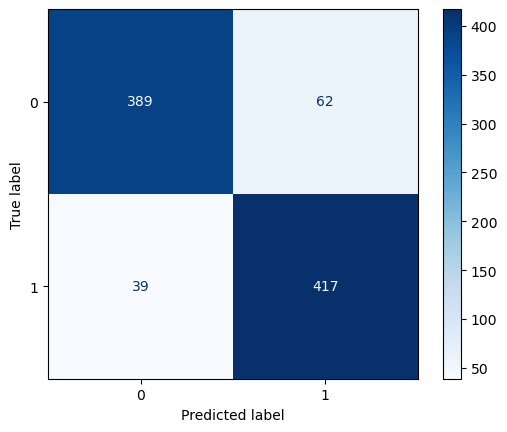

In [322]:
# View confusion matrix
plot_confusion_matrix(gs_nb, X_test, y_test, cmap='Blues', values_format='d');

In [323]:
# Calculate the specificity
spec = tn / (tn + fp)
print('Specificity for Naive Bayes:', spec)

Specificity for Naive Bayes: 0.8625277161862528


In [324]:
sens = tp / (fn + tp)
print('Sensitivity for Naive Bayes:', sens)

Sensitivity for Naive Bayes: 0.9144736842105263


In [325]:
print('Accuracy for NB is: ', accuracy_score(y_test, preds))
print('Precision for NB is: ', precision_score(y_test, preds))
print('Recall for NB is: ', recall_score(y_test, preds))
print('F1 score for NB is: ', f1_score(y_test, preds))

Accuracy for NB is:  0.8886438809261301
Precision for NB is:  0.8705636743215032
Recall for NB is:  0.9144736842105263
F1 score for NB is:  0.8919786096256684


In [326]:
gs_nb_roc_auc = roc_auc_score(y_test, gs_nb.predict_proba(X_test)[:,1])
print('ROC-AUC score for NB is: ', gs_nb_roc_auc)

ROC-AUC score for NB is:  0.9592523437196094


In [364]:
# As I cannot extract the features and coefficients from GridSearch, I need to instantiate the model again

# Instantiate the CountVectorizer with the best parameters found above
cvec = CountVectorizer(max_features=5000, lowercase=False, ngram_range=(1,2))

# Fit and transform the train and test data
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.fit(X_test)

# Instantiate the Naive Bayes Model with the best params
nb = MultinomialNB()

# Fit the model
nb.fit(X_train_cvec, y_train)

MultinomialNB()

In [365]:
coffee_impt_words = pd.DataFrame(data=[cvec.get_feature_names_out(), 
                                     np.exp(nb.feature_log_prob_[1])], 
                                     index=['word', 'prob'])
coffee_impt_words = coffee_impt_words.T.sort_values('prob', ascending=False)

tea_impt_words = pd.DataFrame(data=[cvec.get_feature_names_out(), 
                                     np.exp(nb.feature_log_prob_[0])], 
                                     index=['word', 'prob'])
tea_impt_words = tea_impt_words.T.sort_values('prob', ascending=False)

In [366]:
coffee_impt_words.head(10)

,word,prob
667,floral,0.024178
256,carry,0.006813
4779,using doenst,0.005833
1739,one recommend,0.004987
1596,obsolete yet,0.004898
4466,try see,0.004675
1217,mostly go,0.004542
412,custom temperature,0.004364
4207,timer,0.004319
4651,unsupervisedbeginner,0.004186


In [367]:
tea_impt_words.head(10)

,word,prob
4238,tldr bought,0.043513
2172,plastic hario,0.0047
1730,one mostly,0.004277
901,including,0.004225
1664,oh well,0.004013
3264,rinse mini,0.003696
4466,try see,0.003696
1596,obsolete yet,0.003485
4779,using doenst,0.003432
2849,read get,0.003327


**Insights**: 
1. Advantages:
    * The model is simple and easy to implement
    * the results are decent (AUC Score is 0.96). This is because Naive Bayes requires less training data compared to other models
2. Disadvantages:
    * One of the biggest weakness is that it assumes independence between features, which may not be true in most real-world scenarios
    * Also, it might not perform as well if there are a lot of overlap in the features between coffee and tea. This is highly probable, given that both are drinks and are often compared side by side
3. Also, naive bayes allows us to know the features that are important for the prediction. I then took this opportunity to find the 

## 3.2 Logistic Regression
The main benefit of a logistic regression is that its coefficients are interpretable (sigma), and it performs well for a binary classification problem statement.

In [199]:
# initiating the pipeline with TfidfVectorizer and logistic regression
pipe_logreg = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression(random_state=42))
])

In [200]:
pipe_logreg_params = {
    'tvec__max_features': [1000, 2500, 5000], #include the 𝑁 most popular vocabulary words in the corpus
    "tvec__stop_words":   ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],#capture either unigram or bigram 
    'logreg__penalty':    ['l1', 'l2'], # using Lasso and Ridge regularization
}

In [201]:
gs_logreg = GridSearchCV(pipe_logreg, 
                  param_grid=pipe_logreg_params, 
                  cv=5) # 5 folds CV

In [202]:
gs_logreg.fit(X_train, y_train)

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/pyth

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__penalty': ['l1', 'l2'],
                         'tvec__max_features': [1000, 2500, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [203]:
gs_logreg.best_params_

{'logreg__penalty': 'l2',
 'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [204]:
print(gs_logreg.best_score_)

0.8775413711583925


In [205]:
gs_logreg = gs_logreg.best_estimator_

In [206]:
gs_logreg.score(X_train, y_train) # 0.96

0.9626477541371158

In [207]:
gs_logreg.score(X_test, y_test) # 0.89

0.886438809261301

In [208]:
# Get predictions
preds_lr = gs_logreg.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_lr).ravel()

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


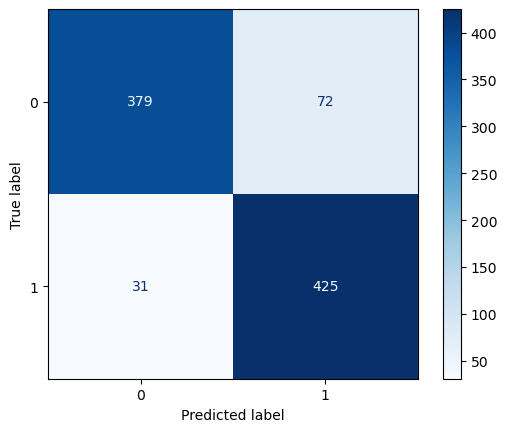

In [209]:
# View confusion matrix
plot_confusion_matrix(gs_logreg, X_test, y_test, cmap='Blues', values_format='d');

In [210]:
spec = tn / (tn + fp)
print('Specificity for LogReg:', spec)

Specificity for LogReg: 0.8403547671840355


In [211]:
sens = tp / (fn + tp)
print('Sensitivity for LogReg:', sens)

Sensitivity for LogReg: 0.9320175438596491


In [212]:
accuracy_score(y_test, preds_lr)

0.886438809261301

In [213]:
print('Accuracy for LogReg: ', accuracy_score(y_test, preds_lr))
print('Precision for LogReg: ', precision_score(y_test, preds_lr))
print('Recall for LogReg: ', recall_score(y_test, preds_lr))
print('F1 score for LogReg: ', f1_score(y_test, preds_lr))

Accuracy for LogReg:  0.886438809261301
Precision for LogReg:  0.8551307847082495
Recall for LogReg:  0.9320175438596491
F1 score for LogReg:  0.8919202518363064


In [214]:
gs_logreg_roc_auc = roc_auc_score(y_test, gs_logreg.predict_proba(X_test)[:,1])
print('ROC-AUC score for LogReg is: ', gs_logreg_roc_auc)

ROC-AUC score for LogReg is:  0.9605554907223713


**Insights**: 
1. Advantages:
    * it is a simple model; and it is suitable for this case as it is a binary classification problem
    * it can be interpreted; it provides probabilities of a prediction belonging to either coffee or tea
2. Disadvantages:
    * it assumes a linear relationship between the independent variables, which may not be true especially in the context of NLP
    * it may not work well when I want to predict more than 2 outcomes

## 3.3 Decision Tree
Decision Tree helps us to decide with feature to be put in the classification model. However, this can easily overfit as it is a greedy algorithm. I will try to use Bagging (Bootstrap Aggregation) Decision Tree, which can help to reduce the variance of individual classifiers, and hence can tame the overfitting tendency of a decision tree model.

In [215]:
pipe_dt = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('bag', BaggingClassifier(random_state=42))
])

In [216]:
param_dt_grid = {
    'tvec__max_features': [1000, 2500, 5000], #include the 𝑁 most popular vocabulary words in the corpus
    "tvec__stop_words":   ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'bag__n_estimators': [10, 50, 100], # number of base estimators in the ensemble
    'bag__max_samples': [0.5, 1.0], # the fraction of samples to draw from X to train each base estimator
    'bag__max_features': [0.5, 1.0], # the fraction of features to draw from X to train each base estimator
    'bag__bootstrap': [True], # with replacement
    'bag__bootstrap_features': [True], # with replacement
}

In [217]:
gs_dt = GridSearchCV(pipe_dt, 
                  param_grid=param_dt_grid, 
                  cv=5)

In [218]:
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('bag',
                                        BaggingClassifier(random_state=42))]),
             param_grid={'bag__bootstrap': [True],
                         'bag__bootstrap_features': [True],
                         'bag__max_features': [0.5, 1.0],
                         'bag__max_samples': [0.5, 1.0],
                         'bag__n_estimators': [10, 50, 100],
                         'tvec__max_features': [1000, 2500, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [219]:
gs_dt.best_params_

{'bag__bootstrap': True,
 'bag__bootstrap_features': True,
 'bag__max_features': 0.5,
 'bag__max_samples': 1.0,
 'bag__n_estimators': 100,
 'tvec__max_features': 2500,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [220]:
gs_dt = gs_dt.best_estimator_

In [221]:
gs_dt.score(X_train, y_train) 

0.9815602836879432

In [222]:
gs_dt.score(X_test, y_test) # 0.87

0.8665931642778391

In [223]:
# Get predictions
preds = gs_dt.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


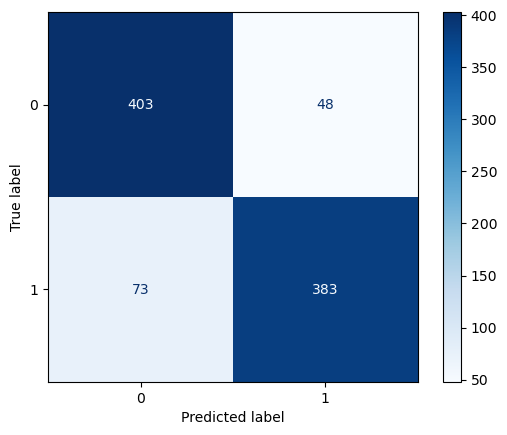

In [224]:
# View confusion matrix
plot_confusion_matrix(gs_dt, X_test, y_test, cmap='Blues', values_format='d');

In [225]:
sens = tp / (fn + tp)
print('Sensitivity for Decision Tree:', sens)

Sensitivity for Decision Tree: 0.8399122807017544


In [226]:
spec = tn / (tn + fp)
print('Specificity for Decision Tree:', spec)

Specificity for Decision Tree: 0.893569844789357


In [227]:
accuracy_score(y_test, preds)

0.8665931642778391

In [228]:
print('Precision for Decision Tree: ', precision_score(y_test, preds))
print('Recall for Decision Tree: ', recall_score(y_test, preds))
print('F1 score for Decision Tree: ', f1_score(y_test, preds))

Precision for Decision Tree:  0.888631090487239
Recall for Decision Tree:  0.8399122807017544
F1 score for Decision Tree:  0.8635851183765502


In [229]:
gs_dt_roc_auc = roc_auc_score(y_test, gs_dt.predict_proba(X_test)[:,1])
print('ROC-AUC score for Decision Tree is: ', gs_dt_roc_auc)

ROC-AUC score for Decision Tree is:  0.9477768701131988


**Insights:**
1. Advantages:
    * the model can capture a more complex non-linear relationships between variables. This is shown via the high validation score (0.98)
2. Disadvantages:
    * this model can easily overfits. This is shown by the much lower test score (0.87) as compared to the validation score

## 3.4 KNN
KNN calculates the distance between neighbors, it's highly sensitive to the magnitude of features. As I am using tf-idf on the X-variables, we don't need to do standard scaling as it is being normalized.

In [230]:
pipe_knn = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [231]:
param_knn_grid = {
    'tvec__max_features': [1000, 2500, 5000], #include the n most popular vocabulary words in the corpus
    "tvec__stop_words":   ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': range(1, 20, 2), # specify the number of neighbors
    'knn__weights': ['uniform', 'distance'], # weight function will be used in prediction. with distance, closer neighbors are weighted more heavily
    'knn__metric': ['manhattan', 'minkowski'], # the fraction of features to draw from X to train each base estimator
    'knn__leaf_size': range(10, 80, 5)
}

In [232]:
gs_knn = GridSearchCV(pipe_knn, 
                  param_grid=param_knn_grid, 
                  cv=5)

In [233]:
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__leaf_size': range(10, 80, 5),
                         'knn__metric': ['manhattan', 'minkowski'],
                         'knn__n_neighbors': range(1, 20, 2),
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__max_features': [1000, 2500, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [234]:
gs_knn.best_params_

{'knn__leaf_size': 10,
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 5,
 'knn__weights': 'distance',
 'tvec__max_features': 1000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [235]:
gs_knn = gs_knn.best_estimator_

In [236]:
gs_knn.score(X_train, y_train)

0.9735224586288416

In [237]:
gs_knn.score(X_test, y_test)

0.6284454244762955

In [238]:
# Get predictions
preds = gs_knn.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


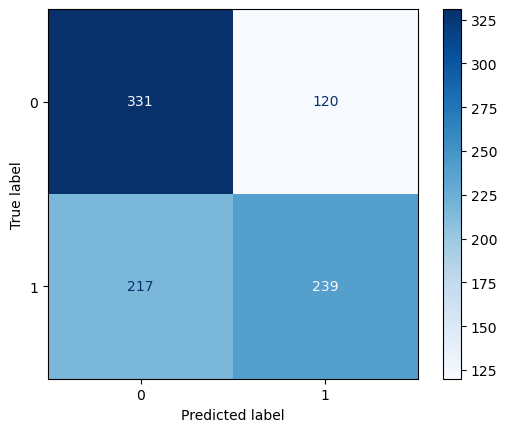

In [243]:
# View confusion matrix
plot_confusion_matrix(gs_knn, X_test, y_test, cmap='Blues', values_format='d');

In [245]:
# first, find out if y_train and y_test has imbalanced data
y_train.value_counts()

1    1062
0    1053
Name: category, dtype: int64

In [246]:
# see if there is an imbalance y_test values
y_test.value_counts()

1    456
0    451
Name: category, dtype: int64

In [247]:
fn_rows

[10,
 11,
 13,
 14,
 17,
 18,
 19,
 20,
 27,
 31,
 35,
 37,
 46,
 47,
 53,
 56,
 58,
 60,
 62,
 63,
 66,
 80,
 92,
 100,
 101,
 102,
 107,
 114,
 115,
 119,
 122,
 125,
 138,
 139,
 141,
 148,
 152,
 153,
 158,
 160,
 161,
 163,
 164,
 168,
 170,
 171,
 174,
 190,
 191,
 194,
 198,
 204,
 211,
 213,
 216,
 220,
 224,
 234,
 238,
 239,
 249,
 264,
 270,
 271,
 272,
 275,
 281,
 283,
 284,
 288,
 290,
 295,
 296,
 298,
 299,
 306,
 313,
 317,
 318,
 320,
 322,
 323,
 324,
 325,
 328,
 330,
 339,
 341,
 345,
 356,
 358,
 369,
 372,
 377,
 381,
 387,
 388,
 391,
 392,
 393,
 403,
 406,
 407,
 412,
 416,
 417,
 419,
 421,
 424,
 429,
 430,
 433,
 434,
 436,
 441,
 442,
 443,
 447,
 449,
 455,
 456,
 463,
 465,
 470,
 474,
 478,
 479,
 484,
 485,
 492,
 493,
 496,
 500,
 507,
 508,
 511,
 524,
 525,
 526,
 531,
 534,
 536,
 546,
 548,
 550,
 555,
 560,
 570,
 581,
 582,
 589,
 592,
 593,
 598,
 604,
 605,
 607,
 612,
 621,
 622,
 638,
 644,
 649,
 651,
 652,
 654,
 658,
 661,
 672,
 680,
 68

In [248]:
X_test.shape

(907,)

In [249]:
preds.shape

(907,)

In [250]:
y_test.shape

(907,)

In [251]:
spec = tn / (tn + fp)
print('Specificity for KNN:', spec)

sens = tp / (fn + tp)
print('Sensitivity for KNN:', sens)

Specificity for KNN: 0.7339246119733924
Sensitivity for KNN: 0.5241228070175439


In [252]:
accuracy_score(y_test, preds)

0.6284454244762955

In [253]:
print('Precision for KNN : ', precision_score(y_test, preds))
print('Recall for KNN : ', recall_score(y_test, preds))
print('F1 score for KNN : ', f1_score(y_test, preds))

Precision for KNN :  0.6657381615598886
Recall for KNN :  0.5241228070175439
F1 score for KNN :  0.5865030674846626


In [254]:
gs_knn_roc_auc = roc_auc_score(y_test, gs_knn.predict_proba(X_test)[:,1])
print('ROC-AUC score for KNN is: ', gs_knn_roc_auc)

ROC-AUC score for KNN is:  0.7136115649434007


**Insights**
1. Advantages:
    * it can handle nonlinear relationships between the variables
    * it has a simple concept and easy to be explained to the business stakeholders
2. Disadvantages:
    * it is a very computationally expensive model. The number of leaves will affect the speed of the construction and query, as well as the memory required to store the tree. 
    * it does not perform well with data points that are very spread out.
    * It is also sensitive to outliers. Given that Reddit posts may contain ads in between posts, the corpus will contains words that are not very related to either coffee or tea.
3. Why KNN fares so badly:
    * KNN cannot find a clear decision boundary when the classes are not well-separated in the feature space. In this case, some of the words here are not exactly unique to each other
    * also, it suffers from the curse of dimensionality, where the performance of the algorithm degrades as the number of features increases
    * it is also highly sensitive to the distance metric

## 3.5 Random Forest

In [255]:
pipe_rf = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state = 42))
])

In [256]:
param_rf_grid = {
    'tvec__max_features': [1000, 2500, 5000], # estimate the amount of words to be included
    "tvec__stop_words":   ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [4, 6],
    'rf__criterion': ['gini', 'entropy', 'log_loss']
}

In [257]:
gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=param_rf_grid, 
                  cv=5)

In [258]:
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_depth': [4, 6],
                         'rf__n_estimators': [100, 150],
                         'tvec__max_features': [1000, 2500, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [259]:
gs_rf.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 4,
 'rf__n_estimators': 150,
 'tvec__max_features': 2500,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [260]:
gs_rf = gs_rf.best_estimator_

In [261]:
gs_rf.score(X_train, y_train) #0.87

0.8765957446808511

In [262]:
gs_rf.score(X_test, y_test) #0.84

0.8500551267916208

In [263]:
# Get predictions
preds = gs_rf.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


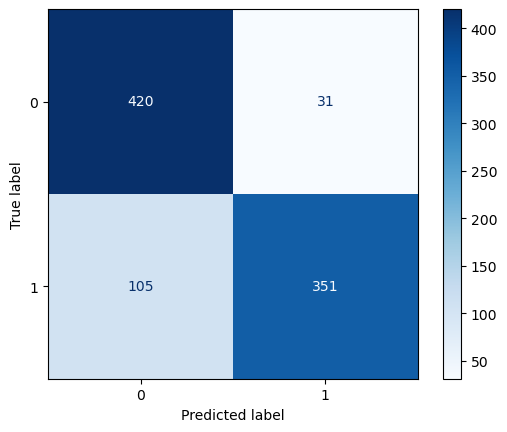

In [264]:
# View confusion matrix
plot_confusion_matrix(gs_rf, X_test, y_test, cmap='Blues', values_format='d');

In [265]:
spec = tn / (tn + fp)
print('Specificity for RF:', spec)

sens = tp / (fn + tp)
print('Sensitivity for RF:', sens)

Specificity for RF: 0.9312638580931264
Sensitivity for RF: 0.7697368421052632


In [266]:
accuracy_score(y_test, preds)

0.8500551267916208

In [267]:
print('Precision for Random Forest : ', precision_score(y_test, preds))
print('Recall for Random Forest : ', recall_score(y_test, preds))
print('F1 score for Random Forest : ', f1_score(y_test, preds))

Precision for Random Forest :  0.918848167539267
Recall for Random Forest :  0.7697368421052632
F1 score for Random Forest :  0.837708830548926


In [268]:
gs_rf_roc_auc = roc_auc_score(y_test, gs_rf.predict_proba(X_test)[:,1])
print('ROC-AUC score for Random Forest is: ', gs_rf_roc_auc)

ROC-AUC score for Random Forest is:  0.94152127825106


**Observation on the Random Forest:**
1. Advantages:
    * Random forest allows us to reduce overfitting, as it calculates majority of votes across trees (instead of using immediate distance). This gives a more accurate and stable prediction
2. Disadvantages:
    * with more trees, it may make the algorithm slower as it is computationally more expensive
    * also, it is hard to be interpretable as a single decision tree; hence it is harder to explain the concepts and models to stakeholders

## 3.6 SVM

In [269]:
pipe_svm = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svm', SVC(random_state = 42, probability=True))
])

In [270]:
param_svm_grid = {
    'tvec__max_features': [1000, 2500, 5000], # estimate the amount of words to be included
    "tvec__stop_words":   ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'svm__C': range(1,10), # tradeoffs between smooth decision boundary
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'poly']
}

In [271]:
gs_svm = GridSearchCV(pipe_svm, 
                  param_grid=param_svm_grid, 
                  cv=5)

In [272]:
gs_svm.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'svm__C': range(1, 10),
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['rbf', 'poly'],
                         'tvec__max_features': [1000, 2500, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [273]:
gs_svm = gs_svm.best_estimator_

In [274]:
gs_svm.score(X_train, y_train)

0.983451536643026

In [275]:
gs_svm.score(X_test, y_test) 

0.8919514884233738

In [276]:
# Get predictions
preds = gs_svm.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


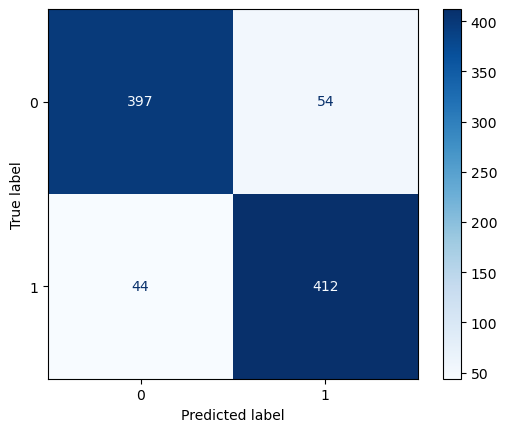

In [277]:
# View confusion matrix
plot_confusion_matrix(gs_svm, X_test, y_test, cmap='Blues', values_format='d');

In [278]:
spec = tn / (tn + fp)
print('Specificity for SVM:', spec)

sens = tp / (fn + tp)
print('Sensitivity for SVM:', sens)

Specificity for SVM: 0.8802660753880266
Sensitivity for SVM: 0.9035087719298246


In [279]:
accuracy_score(y_test, preds)

0.8919514884233738

In [280]:
print('Precision for SVM : ', precision_score(y_test, preds))
print('Recall for SVM : ', recall_score(y_test, preds))
print('F1 score for SVM : ', f1_score(y_test, preds))

Precision for SVM :  0.8841201716738197
Recall for SVM :  0.9035087719298246
F1 score for SVM :  0.8937093275488069


In [281]:
gs_svm_roc_auc = roc_auc_score(y_test, gs_svm.predict_proba(X_test)[:,1])
print('ROC-AUC score for SVM is: ', gs_svm_roc_auc)

ROC-AUC score for SVM is:  0.9395957326798147


**Observation**: 
1. Advantages:
    * SVM can classify unseen data well. And it is evident because it has one of the highest test score among all the models
    * also, it can identify non-linear plane well, which suits NLP use cases well.
2. Disadvantages
    * However, it is also very prone to overfitting. This is shown on the high accuracy with validation sets.
    * Also, it is very memory intensive, harder to tune as we need to pick the right kernel and parameters, and don't scale well to larger datasets

## 3.7 AdaBoost

In [282]:
pipe_ada = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))
])

In [283]:
param_ada_grid = {
    'tvec__max_features': [1000, 2500, 5000], # estimate the amount of words to be included
    "tvec__stop_words":   ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'ada__n_estimators': [50,100], 
    'ada__base_estimator__max_depth': [1,2],
    'ada__learning_rate': [.9, 1.]
}

In [284]:
gs_ada = GridSearchCV(pipe_ada, 
                  param_grid=param_ada_grid, 
                  cv=5)

In [285]:
gs_ada.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))]),
             param_grid={'ada__base_estimator__max_depth': [1, 2],
                         'ada__learning_rate': [0.9, 1.0],
                         'ada__n_estimators': [50, 100],
                         'tvec__max_features': [1000, 2500, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [286]:
gs_ada = gs_ada.best_estimator_

In [287]:
gs_ada.score(X_train, y_train)

0.9541371158392435

In [288]:
gs_ada.score(X_test, y_test) 

0.8180815876515987

In [289]:
# Get predictions
preds = gs_ada.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


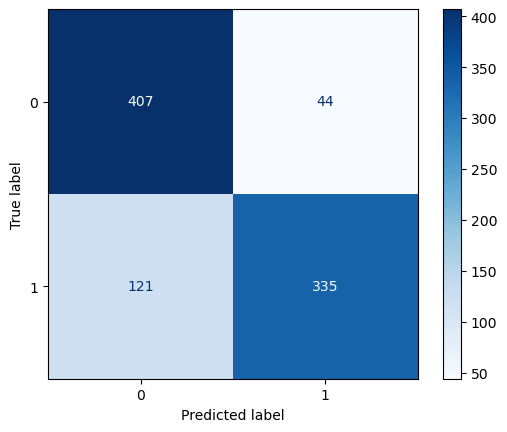

In [290]:
# View confusion matrix
plot_confusion_matrix(gs_ada, X_test, y_test, cmap='Blues', values_format='d');

In [291]:
spec = tn / (tn + fp)
print('Specificity for AdaBoost:', spec)

sens = tp / (fn + tp)
print('Sensitivity for AdaBoost:', sens)

Specificity for AdaBoost: 0.9024390243902439
Sensitivity for AdaBoost: 0.7346491228070176


In [292]:
accuracy_score(y_test, preds)

0.8180815876515987

In [293]:
print('Precision for AdaBoost : ', precision_score(y_test, preds))
print('Recall for AdaBoost : ', recall_score(y_test, preds))
print('F1 score for AdaBoost : ', f1_score(y_test, preds))

Precision for AdaBoost :  0.8839050131926122
Recall for AdaBoost :  0.7346491228070176
F1 score for AdaBoost :  0.8023952095808383


In [294]:
gs_ada_roc_auc = roc_auc_score(y_test, gs_ada.predict_proba(X_test)[:,1])
print('ROC-AUC score for AdaBoost is: ', gs_ada_roc_auc)

ROC-AUC score for AdaBoost is:  0.9223727972925663


**Insights**: 
1. Advantages:
    * AdaBoost can be a good out-of-the-box classifier for binary values. 
    * Its output of the other learning algorithms is combined into a weighted sum that represents the final output of the hoosted classifier
    * Also, it is less likely to overfit, as the input parameters are not jointly optimized
2. Disadvantages:
    * It is quite sensitive to noisy data.

# 4.0 Summary, Recommendation and Future Improvements

## 4.1 Summary
There are a lot of metrics that we can pick to evaluate the models. I will focus on these for: precision, recall, f1 score, and ROC-AUC score. 
- Precision score can tell the proportion of true coffee posts among the predicted coffee posts. This helps to minimize false positives (classifying tea as coffee)
- Recall score can tell the proportion of true coffee among actual coffee posts. This can minimize false negative (classifying coffee as tea)
- F1 Score is the harmonic mean between precision and recall. For this case, I think we should go for the higher F1 score to represent the effectiveness in identifying the posts correctly
- ROC-AUC Score represents the trade-off between TPR/FPR, and its ability to distinguish both

In consideration of the business problem, I would recommend a model that can classify coffee better than tea. This is to avoid missed opportunities of learning insights about coffee consumers as it is more complex than tea consumers. The model also has to be flexible enough to be fined tune for future.

| Models | Training Score | Test Score | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Naive Bayes | 0.96 | 0.89 | 0.88 | 0.87 | 0.92 | 0.89 | 0.96 |
| LogReg | 0.96 | 0.88 | 0.88 | 0.85 | 0.93 | 0.89 | 0.96 |
| Decision Tree | 0.98 | 0.87 | 0.87 | 0.89 | 0.84 | 0.86 | 0.95 |
| KNN | 0.97 | 0.63 | 0.62 | 0.67 | 0.52 | 0.59 | 0.71 |
| Random Forest | 0.88 | 0.85 | 0.85 | 0.92 | 0.76 | 0.84 | 0.94 |
| SVM | 0.98 | 0.89 | 0.89 | 0.88 | 0.90 | 0.89 | 0.94 |
| AdaBoost | 0.95 | 0.82 | 0.82 | 0.9 | 0.73 | 0.81 | 0.92 |

## 4.2 Recommendations

In order to have a model that can take in a wider range of words, and balance the True Positive Rates vs True Negative Rate, I would suggest the following models:
1. Logistic Regression: this is a very efficient model in a binary classification model, but it may not work well on areas beyond two categories. Also, this is a simpler model
2. SVM: this can classify unseen data well and works very well for NLP. However, it is very computationally expensive.
3. Decision tree: this model can capture a more complex, non-linear relationship. It is also resilient against outliers. 

## 4.3 Future Enhancements

1. use Word2Vec to distinguish words and use semantics: 
    * Word2Vec is a pre-trained model that can help find out the related words that can help 
2. Include explanability of the model for LogReg: 
    * This allows me to understand the important words that increase the predictability of a post about coffee, or a post about tea. 
    * This can help in keyword discovery, which can be fed into marketing posts
3. Include sentiment analysis: 
    * Sentiment analysis can help in understanding what the users feel. 
    * This can help to shape the right marketing messages as well. For example - to market to coffee users, I can use words that signals the positive feelings of consuming coffee.
4. Include a wider range of corpus: 
    * There are areas among Tea that are not captured - for example, Boba Tea. 
    * Boba is a great invention of Tea and offers a variety of marketing this product beyond its raw material.